<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Описание проекта
Данные находятся в трёх файлах:
gold_recovery_train_new.csv — обучающая выборка;
gold_recovery_test_new.csv — тестовая выборка;
gold_recovery_full_new.csv — исходные данные.
Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.
Инструкция по выполнению проекта
1. Подготовьте данные
1.1. Откройте файлы и изучите их.
Путь к файлам:
/datasets/gold_recovery_train_new.csv. Скачать датасет
/datasets/gold_recovery_test_new.csv. Скачать датасет
/datasets/gold_recovery_full_new.csv. Скачать датасет
1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.
1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
1.4. Проведите предобработку данных.
2. Проанализируйте данные
2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.
2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
3. Постройте модель
3.1. Напишите функцию для вычисления итоговой sMAPE.
3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

## Подготовка данных

In [86]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
try:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    
except:
    data_train = pd.read_csv('C:/Users/анатолий/Documents/datasets/gold_recovery_train_new.csv')
    data_test = pd.read_csv('C:/Users/анатолий/Documents/datasets/gold_recovery_test_new.csv')
    data_full = pd.read_csv('C:/Users/анатолий/Documents/datasets/gold_recovery_full_new.csv')

In [3]:
data_train = data_train.set_index('date')# сделали дату индексом
data_train = data_train.fillna(method='bfill') # заполнили пропуски ближним значением соседа
display(data_train.head())
print(data_train.info())
print(data_train.isna().sum())
data_train.shape

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                             

(14149, 86)

In [4]:
data_test = data_test.set_index('date')# сделали дату индексом
data_test = data_test.fillna(method='bfill')
display(data_test.head())
print(data_test.info())
print(data_test.isna().sum())
print(data_test.shape)



,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [5]:
data_full = data_full.set_index('date')# сделали дату индексом
data_full = data_full.fillna(method='bfill')
display(data_full.head())
print(data_full.info())
print(data_full.isna().sum())
print(data_full.shape)


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19439 non-null  float64
 1   final.output.concentrate_pb                         19439 non-null  float64
 2   final.output.concentrate_sol                        19439 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19439 non-null  float64
 6   final.output.tail_pb                                19439 non-null  float64
 7   final.output.tail_sol                               19439 non-null  float64
 8   final.output.tail_au                             

Колонку дат сделали индексами датафрейма
Есть разные количества пропусков в признаках- заполнил ближайшими значениями и все стало хорошо.
Тип данных для этих датасетов float64 вроде как ОК.
В датасете test много данных не хватает - решим проблему позже при подготовке тестирования моделей.
Основные библиотеки загружены.

In [6]:
#      выделение признаков в отдельный датасет
rougher_subset = []
for column in data_full.columns:
    if 'rougher' in column and 'output' not in column and 'calculation' not in column:
        rougher_subset.append(column)
rougher_subset

['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level']

In [7]:
#_ = full_features[[c for c in full_features.columns if c not in rougher_features.columns]].iloc[:,:16].hist(figsize=(16,16), bins=100)

In [8]:
rougher_features = data_train[rougher_subset]
full_features = data_train[data_test.columns]

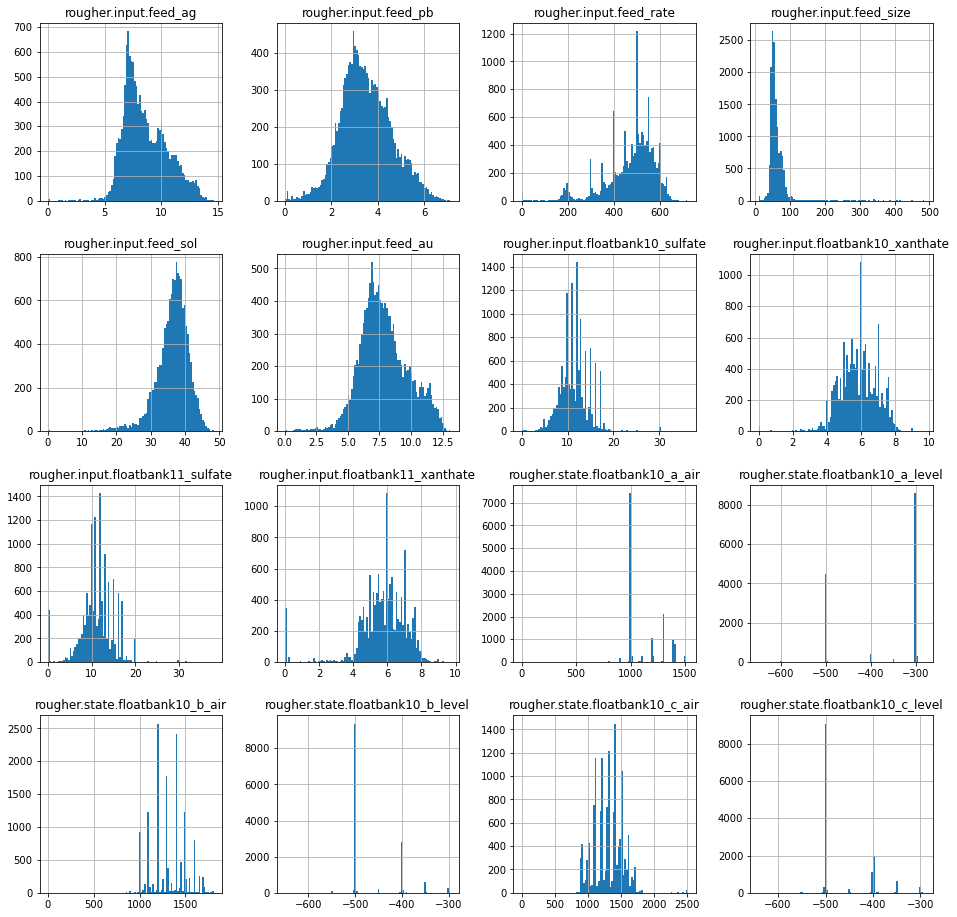

In [9]:
_ = rougher_features.iloc[:,:16].hist(figsize=(16,16), bins=100)

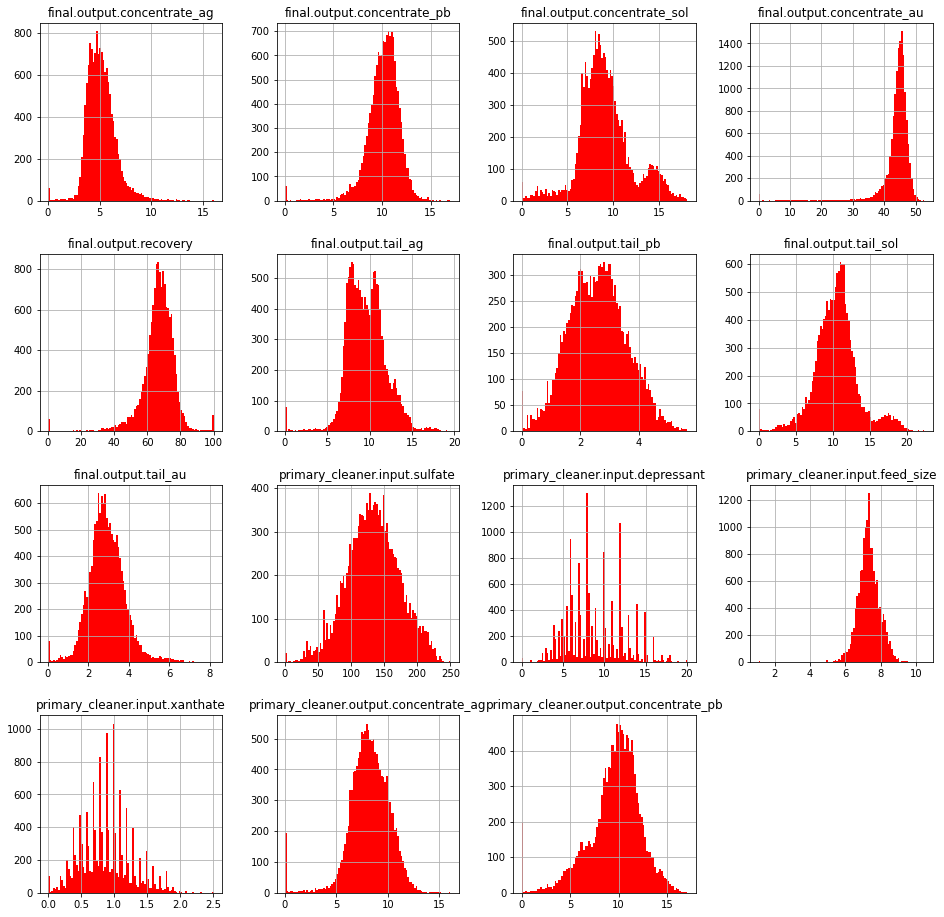

In [10]:
_ = data_train.iloc[:,:15].hist(figsize=(16,16), bins=100,color='r')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> 👍</font>

In [11]:
# создадим df для расчета эффективности обогащения
df_data_train = data_train[['rougher.output.concentrate_au','rougher.input.feed_au',\
                                   'rougher.output.tail_au','rougher.output.recovery']]

# расчет эффективности обогащения.
app = df_data_train['rougher.output.concentrate_au'] * (df_data_train['rougher.input.feed_au'] -\
                                                            df_data_train['rougher.output.tail_au'])
down =df_data_train['rougher.input.feed_au'] * (df_data_train['rougher.output.concentrate_au'] -\
                                                             df_data_train['rougher.output.tail_au'])
df_data_train['rougher.output.recovery_calcul'] = app / down *100
display(df_data_train.head())
MAE = (df_data_train['rougher.output.recovery_calcul'] - df_data_train['rougher.output.recovery']).abs().sum()/\
           len(df_data_train['rougher.output.recovery_calcul'])

print('Среднее вычисленное значение',df_data_train['rougher.output.recovery_calcul'].mean())
print('Среднее табличное значение',df_data_train['rougher.output.recovery'].mean())
print('MAE =',MAE)  

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,rougher.output.recovery_calcul
date,,,,,
2016-01-15 00:00:00,19.793808,6.486150,1.170244,87.107763,87.107763
2016-01-15 01:00:00,20.050975,6.478583,1.184827,86.843261,86.843261
2016-01-15 02:00:00,19.737170,6.362222,1.162562,86.842308,86.842308
2016-01-15 03:00:00,19.320810,6.118189,1.079755,87.226430,87.226430
2016-01-15 04:00:00,19.216101,5.663707,1.012642,86.688794,86.688794


Среднее вычисленное значение 82.70450164550269
Среднее табличное значение 82.70450164550267
MAE = 9.73512347450521e-15


## Анализ данных

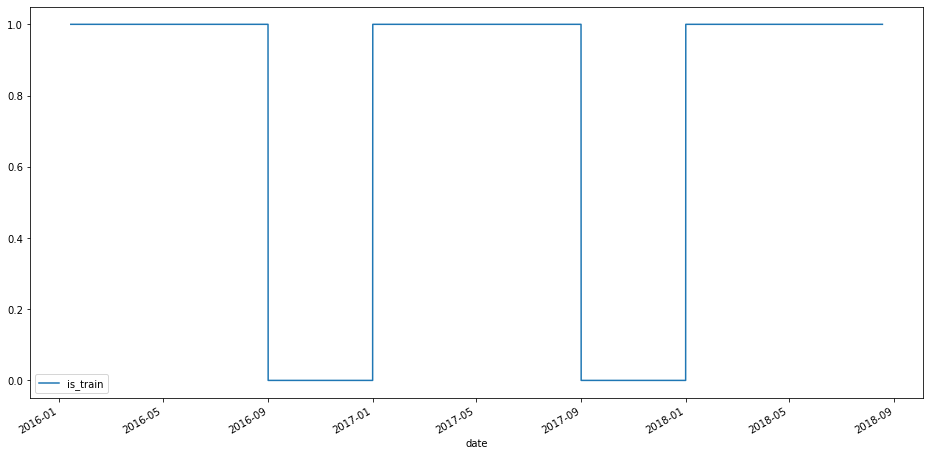

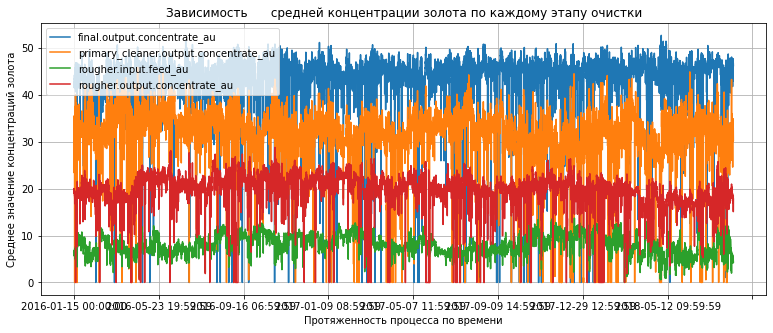

In [12]:
#распределения средних концентраций для золота по каждому этапу очистки

df = pd.DataFrame(index=pd.to_datetime(data_train.index, format='%Y-%m-%d %H:%M:%S'))
df['is_train'] = 1
df = pd.concat([df, pd.DataFrame(index=pd.to_datetime(data_test.index, format='%Y-%m-%d %H:%M:%S'))]).fillna(0)
_ = df.plot(figsize=(16, 8))


data_full.pivot_table(index='date',\
                          values=['rougher.input.feed_au','rougher.output.concentrate_au',\
        'primary_cleaner.output.concentrate_au','final.output.concentrate_au'],\
                     aggfunc={'rougher.input.feed_au':np.mean,\
                              'rougher.output.concentrate_au':np.mean,\
                              'primary_cleaner.output.concentrate_au':np.mean,\
                             'final.output.concentrate_au':np.mean}).plot(grid=True,legend='best',title='Зависимость\
      средней концентрации золота по каждому этапу очистки',figsize=(13,5));

plt.xlabel('Протяженность процесса по времени');
plt.ylabel('Среднее значение концентраций золота');

Картинка красивая, но это считаем реальными данными, поэтому не будем бороться с аномалиями ведь скорее всего
люди работали ответственно и все данные такие как есть.
Да и интересно посмотреть как модели будут учиться на них.


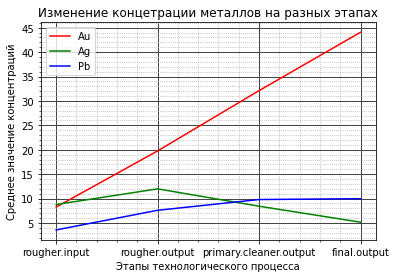

In [13]:
plt.plot(['rougher.input','rougher.output','primary.cleaner.output','final.output'],\
         [data_full['rougher.input.feed_au'].mean(),\
         data_full['rougher.output.concentrate_au'].mean(),\
         data_full['primary_cleaner.output.concentrate_au'].mean(),\
         data_full['final.output.concentrate_au'].mean()], color='red',label='Au')
plt.plot(['rougher.input','rougher.output','primary.cleaner.output','final.output'],\
         [data_full['rougher.input.feed_ag'].mean(),\
         data_full['rougher.output.concentrate_ag'].mean(),\
         data_full['primary_cleaner.output.concentrate_ag'].mean(),\
         data_full['final.output.concentrate_ag'].mean()], color='green',label='Ag');
plt.plot(['rougher.input','rougher.output','primary.cleaner.output','final.output'],\
         [data_full['rougher.input.feed_pb'].mean(),\
         data_full['rougher.output.concentrate_pb'].mean(),\
         data_full['primary_cleaner.output.concentrate_pb'].mean(),\
         data_full['final.output.concentrate_pb'].mean()], color='blue',label='Pb');

plt.xlabel('Этапы технологического процесса')
plt.ylabel('Среднее значение концентраций')
plt.minorticks_on() #оси где отображается минорная сетка
plt.grid(which='major',color='#444',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':');
plt.legend(loc='best');
plt.title('Изменение концетрации металлов на разных этапах');

Это концентрации металлов на разных этапах очистки.
Видим непрерывный рост концетрации золота - процесс идет хорошо,серебро после флотации уменьшается, а свинец
выходит на плато после первичной очистки.

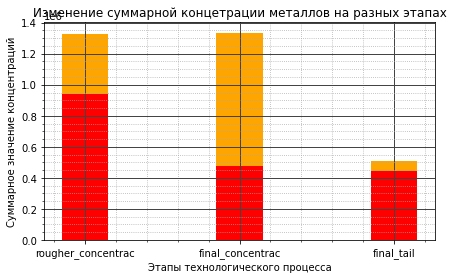

In [14]:
# суммарную концентрация всех веществ  в сырье
rougher_concnt = data_full[['rougher.output.concentrate_ag','rougher.output.concentrate_pb',\
            'rougher.output.concentrate_sol','rougher.output.concentrate_au']].sum(axis=1).sum()
#суммарную концентрация всех веществ в финале
final_concnt = data_full[['final.output.concentrate_ag','final.output.concentrate_pb',\
            'final.output.concentrate_sol','final.output.concentrate_au']].sum(axis=1).sum()
#суммарную концентрация всех веществ в финале хвостов
final_tail = data_full[['final.output.tail_ag','final.output.tail_pb',\
            'final.output.tail_sol','final.output.tail_au']].sum(axis=1).sum()
#     КОНЦЕТРАЦИЯ БЕЗ ЗОЛОТА
rougher_concnt1 = data_full[['rougher.output.concentrate_ag','rougher.output.concentrate_pb',\
            'rougher.output.concentrate_sol']].sum(axis=1).sum()

final_concnt1 = data_full[['final.output.concentrate_ag','final.output.concentrate_pb',\
            'final.output.concentrate_sol']].sum(axis=1).sum()

final_tail1 = data_full[['final.output.tail_ag','final.output.tail_pb',\
            'final.output.tail_sol']].sum(axis=1).sum()
y1=[rougher_concnt1,final_concnt1,final_tail1]
fig=plt.figure(figsize=(7,4))
ax=fig.add_subplot()
y=[rougher_concnt,final_concnt,final_tail]
ax.bar(['rougher_concentrac','final_concentrac','final_tail'],y,color='orange',width=0.3)
ax.bar(['rougher_concentrac','final_concentrac','final_tail'],y1,color='red',width=0.3)# концентрация бeз золота
plt.xlabel('Этапы технологического процесса')
plt.ylabel('Суммарное значение концентраций')
plt.minorticks_on() #оси где отображается минорная сетка
plt.grid(which='major',color='#444',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':');
plt.title('Изменение суммарной концетрации металлов на разных этапах');


На диаграмме вроде все логично - 
желтый столбец это общая концентрация и так как золото растет то не смотря на понижение концентрации уже без золота
(красный столбец) на конечной видим,что в финальных хвостах золота остается мало

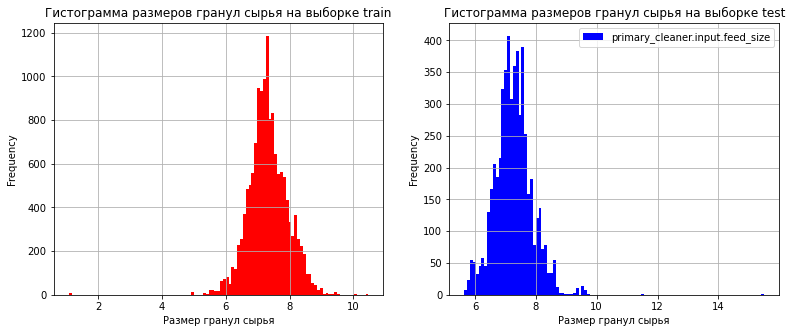

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_train['primary_cleaner.input.feed_size'].plot(kind='hist',bins=105,\
                        color='r',grid=True,subplots=True,ax=ax1)
ax1.set_title('Гистограмма размеров гранул сырья на выборке train')
ax1.set_xlabel('Размер гранул сырья')

data_test['primary_cleaner.input.feed_size'].plot(y='duration',kind='hist',bins=105,\
                    color='blue',grid=True,subplots=True,ax=ax2)
ax2.set_title('Гистограмма размеров гранул сырья на выборке test');
ax2.set_xlabel('Размер гранул сырья');

plt.legend(loc='best');

In [16]:
print('Средний размер гранул в выборке train: {:.2f}\n'.format(
    data_train['primary_cleaner.input.feed_size'].mean()
),'дисперсия:{:.2f}\n'.format(
    np.var(data_train['primary_cleaner.input.feed_size'])
),'стандартное отклонение:{:.2f}\n'.format(
    np.std(data_train['primary_cleaner.input.feed_size'])))

print('Средний размер гранул в выборке test: {:.2f}\n'.format(
    data_test['primary_cleaner.input.feed_size'].mean()
),'дисперсия:{:.2f}\n'.format(
    np.var(data_test['primary_cleaner.input.feed_size'])
),'стандартное отклонение:{:.2f}\n'.format(
    np.std(data_test['primary_cleaner.input.feed_size'])))

Средний размер гранул в выборке train: 7.32
 дисперсия:0.38
 стандартное отклонение:0.61

Средний размер гранул в выборке test: 7.27
 дисперсия:0.37
 стандартное отклонение:0.61



Средний размер гранул в выборке train: 7.32
 дисперсия:0.38
 стандартное отклонение:0.61

Средний размер гранул в выборке test: 7.27
 дисперсия:0.37
 стандартное отклонение:0.61
 
Размер гранул можно сказать не очень сильно различается 

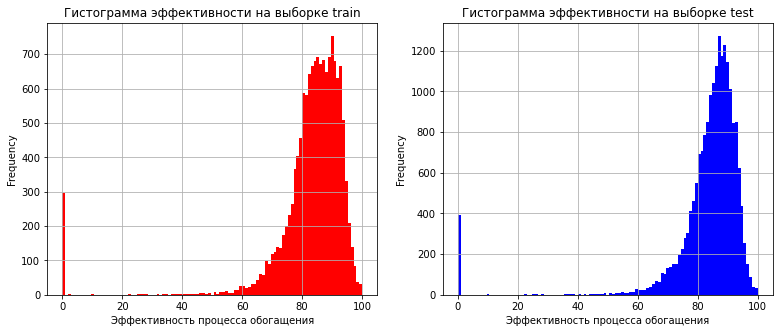

In [17]:
data_test_plot = data_full[['rougher.output.recovery']]# почему то исходный датасет изменился
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_train['rougher.output.recovery'].plot(kind='hist',bins=105,\
                        color='r',grid=True,subplots=True,ax=ax1)
ax1.set_title('Гистограмма эффективности на выборке train')
ax1.set_xlabel('Эффективность процесса обогащения')

data_test_plot['rougher.output.recovery'].plot(kind='hist',bins=105,\
                    color='blue',grid=True,subplots=True,ax=ax2)
ax2.set_title('Гистограмма эффективности на выборке test');
ax2.set_xlabel('Эффективность процесса обогащения');


Да здесь видны не понятные  значения эффективности 0 и 100%.
Если в реальности то можно было бы уточнить у специалистов золотоочистки,а так примем это за нормальную ситуацию
и пусть модели отрабатывают возможно и реальные ситуации с такими значениями эффективности.

Проанализируем признаки, недоступные в тестовой выборке.

In [18]:
data = data_train[[c for c in data_train.columns if c not in data_test.columns]]
print(data.shape)
data.info()

(14149, 34)
<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                 

 В тестовом датасете нет "хвостов",данных по выходным концентрациям, также технологические и расчётные эффективности восстановления после флотации и полной - добавим их из full датасета.


## Модель

Несколько мыслей про тренировку моделей-не знаю прав ли я.
Не буду выводить расчет sMAPE через созданную make_score мне кажется все те метрики которые защиты в алгоритм оптимизации функции потерь sklearn лучше отрабатываются.Поэтому буду смотреть на увеличение r2 и минимизацию MSE
хотя кросс-валидация и обеспечивает только лишь меньшее смешение(не утверждаю но так понимаю)

In [19]:
# строим train и target для этапа rougher
features_train = data_train.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
features_train_rougher = features_train[[x for x in features_train.columns if 'rougher' in x\
                    and 'output' not in x and 'calculation' not in x]]
target_rougher = data_train['rougher.output.recovery']
display(features_train_rougher.head())   
features_train_rougher.info()
print(target_rougher.head())
print('Размер features_train_rougher',features_train_rougher.shape)
print('Размер target_rougher:',target_rougher.shape)

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,...,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636
2016-01-15 01:00:00,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,...,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001
2016-01-15 02:00:00,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,...,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147
2016-01-15 03:00:00,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578,...,1600.059442,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943157,-450.030142,1400.234743,-449.790835
2016-01-15 04:00:00,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707,10.957755,6.198826,10.960521,6.194897,...,1600.208824,-449.599614,1600.357732,-450.034364,1599.759049,-449.909799,1401.560902,-448.877187,1401.160227,-450.407128


<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   rougher.input.feed_ag               14149 non-null  float64
 1   rougher.input.feed_pb               14149 non-null  float64
 2   rougher.input.feed_rate             14149 non-null  float64
 3   rougher.input.feed_size             14149 non-null  float64
 4   rougher.input.feed_sol              14149 non-null  float64
 5   rougher.input.feed_au               14149 non-null  float64
 6   rougher.input.floatbank10_sulfate   14149 non-null  float64
 7   rougher.input.floatbank10_xanthate  14149 non-null  float64
 8   rougher.input.floatbank11_sulfate   14149 non-null  float64
 9   rougher.input.floatbank11_xanthate  14149 non-null  float64
 10  rougher.state.floatbank10_a_air     14149 non-null  float64
 11  rougher.state.

In [20]:
# строим train и target для этапа final
features_train_final = data_train[data_test.columns]
target_final = data_train['final.output.recovery']
features_train_final.info()
print('Размер target_final:',target_final.shape)
print('Размер features_train_final',features_train_final.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               14149 non-null  float64
 1   primary_cleaner.input.depressant            14149 non-null  float64
 2   primary_cleaner.input.feed_size             14149 non-null  float64
 3   primary_cleaner.input.xanthate              14149 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      14149 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    14149 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      14149 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    14149 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      14149 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    14149 non-nu

In [21]:
# строим test и target_test   этапа rougher

data_test_real = data_full[[c for c in data_full.columns if c in data.columns]]
data_test_good = pd.merge(data_test,data_test_real,how='inner',on='date')

features_test = data_test_good.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
features_test_rougher = features_test[[x for x in features_test.columns if 'rougher' in x\
                  and 'output' not in x and 'calculation' not in x]]
target_test_rougher = data_test_good['rougher.output.recovery']
print(features_test_rougher.shape)
print(target_test_rougher.shape)


(5290, 22)
(5290,)


In [22]:
# строим test и target_test   этапа final
features_test_final = features_test[[x for x in features_test.columns if \
                   'tail' not in x and 'calculation' not in x and 'concentrate' not in x]]
target_test_final = data_test_good['final.output.recovery']
features_test_final.info()
print('Размер target_test_final:',target_test_final.shape)
print('Размер features_test_final',features_test_final.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [23]:

def sMape_func(y, y_pred):
    
    smape_result = 100/len(y)*np.sum(2*np.abs(y_pred - y) /\
                                             (np.abs(y) + np.abs(y_pred)))
    return smape_result
    

scorer = make_scorer(sMape_func, greater_is_better=False)
    

In [24]:
model_lr = LinearRegression()
model_lr.fit(features_train_rougher,target_rougher)
smape_score_rougher = cross_val_score(model_lr,features_train_rougher,target_rougher,scoring = scorer,verbose=1, cv = 5)
print(smape_score_rougher.mean())

-11.749571368446361


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [25]:
pipe_lr=make_pipeline(StandardScaler(),LinearRegression())
pipe_lr=pipe_lr.fit(features_train_rougher,target_rougher)
pred = pipe_lr.predict(features_train_rougher)
r2_score(target_rougher,pred)

0.16863086720092202

In [26]:
#     потренеруемся на выборе линейных моделей
lr = LinearRegression()
lr.fit(features_train_rougher,target_rougher)
pred_lr = lr.predict(features_train_rougher)
print('Значение r2 на .predict()',r2_score(target_rougher,pred_lr))

R2 = cross_val_score(lr,features_train_rougher,target_rougher,scoring='r2',cv=5)
print('Значение r2 на кроссвалидации',R2.mean())

Значение r2 на .predict() 0.16863086720092224
Значение r2 на кроссвалидации -0.22505182948205188


In [27]:
# выбираем лучшую модель и лучшие параметры

from sklearn.linear_model import SGDRegressor
param_dist = {"eta0": [ 0.01,0.1,1]} 
model_sgd = SGDRegressor(tol=.01) 
n_iter_search = 7 
grid = RandomizedSearchCV(model_sgd, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search, 
                                   cv=3,verbose=1,n_jobs=-1 
                                   ) 
grid = grid.fit(features_train_rougher,target_rougher) 
R2 = cross_val_score(grid,features_train_rougher,target_rougher,scoring = 'r2', cv = 3)

print("Лучшие параметры: {}".format(grid.best_params_)) 
print("Лучшая оценка R2: {}".format(grid.best_score_))
print(R2.mean())

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Лучшие параметры: {'eta0': 0.01}
Лучшая оценка R2: -1.1809881162037582e+28
-2.147653398037365e+28


In [28]:
#    RANSAC и это лучшие параметры
from sklearn.linear_model import RANSACRegressor
model_ransac =RANSACRegressor(LinearRegression(),
                             max_trials = 10000,
                             min_samples = 1000,
                             loss = 'absolute_loss',random_state=12345,
                              residual_threshold = 3)
                               
model_ransac.fit(features_train_rougher,target_rougher)
R2_ransac = cross_val_score(model_ransac,features_train_rougher,target_rougher,scoring='r2',cv=3)
print('Усредненная r2 RANSACRegressor модели: {:.2f}'.format(R2_ransac.mean()))

target_pred_ransac =model_ransac.predict(features_train_rougher)

print('Усредненная MSE RANSACRegressor модели',mean_absolute_error(target_rougher,target_pred_ransac))
print('Предсказанная R2 RANSACRegressor модели',r2_score(target_rougher,target_pred_ransac))


Усредненная r2 RANSACRegressor модели: -0.58
Усредненная MSE RANSACRegressor модели 6.0254626955913455
Предсказанная R2 RANSACRegressor модели 0.11412064178094827


R2 для predict на train= 0.035579572135987614
R2 для predict на test= 0.14520436855336127


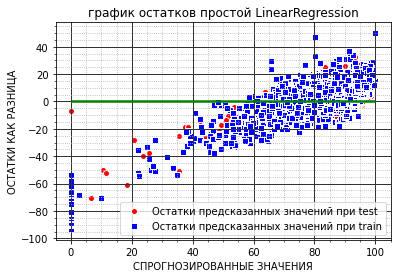

In [97]:
model_rougher = LinearRegression()
model_rougher.fit(features_test_rougher,target_test_rougher)
pred_test = model_rougher.predict(features_test_rougher)
pred_train = model_rougher.predict(features_train_rougher)
print('R2 для predict на train=',r2_score(target_rougher,pred_train))
print('R2 для predict на test=',r2_score(target_test_rougher,pred_test))


 # строим график остатков простойLinearRegression 
plt.scatter(target_test_rougher,target_test_rougher-pred_test,
         c='red',marker='o',edgecolor='white',
         label='Остатки предсказанных значений при test')

plt.scatter(target_rougher,target_rougher-pred_train,
           c='blue',marker='s',edgecolor='white',
           label='Остатки предсказанных значений при train')
plt.xlabel('СПРОГНОЗИРОВАННЫЕ ЗНАЧЕНИЯ')
plt.ylabel('ОСТАТКИ КАК РАЗНИЦА')
plt.legend(loc='lower right')
plt.hlines(y=0,xmin=0,xmax=100,color='green',lw=2.5)
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('график остатков простой LinearRegression')
plt.show()

R2 для predict на train= 0.09002433845895319
R2 для predict на test= 0.09393444031361775


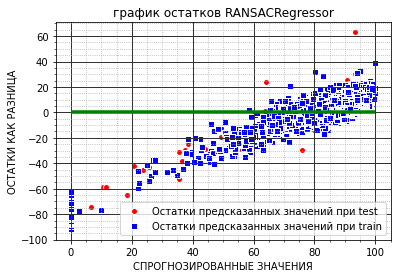

In [98]:
#          RANSAC
model_ransac.fit(features_test_rougher,target_test_rougher)
pred_test = model_ransac.predict(features_test_rougher)
pred_train = model_ransac.predict(features_train_rougher)
print('R2 для predict на train=',r2_score(target_rougher,pred_train))
print('R2 для predict на test=',r2_score(target_test_rougher,pred_test))


 # строим график остатков
plt.scatter(target_test_rougher,target_test_rougher-pred_test,
         c='red',marker='o',edgecolor='white',
         label='Остатки предсказанных значений при test')

plt.scatter(target_rougher,target_rougher-pred_train,
           c='blue',marker='s',edgecolor='white',
           label='Остатки предсказанных значений при train')
plt.xlabel('СПРОГНОЗИРОВАННЫЕ ЗНАЧЕНИЯ')
plt.ylabel('ОСТАТКИ КАК РАЗНИЦА')
plt.legend(loc='lower right')
plt.hlines(y=0,xmin=0,xmax=100,color='green',lw=3.5)
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('график остатков RANSACRegressor')
plt.show()

R2 для predict на train= 0.3432963947834389
R2 для predict на test= -3.1192676466221956
R2= [-10.1286208  -40.46951681  -3.15552656]
R2 для predict на train= 0.3432963947834389
R2 для predict на test= -3.1192676466221956


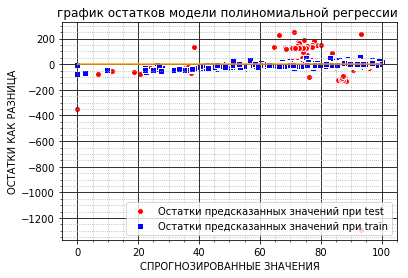

In [99]:
# модель полиномиальной регрессии

model_polyn = make_pipeline(StandardScaler(),PolynomialFeatures(2),LinearRegression())
model_polyn.fit(features_train_rougher,target_rougher)
pred_train = model_polyn.predict(features_train_rougher)
pred_test = model_polyn.predict(features_test_rougher)


print('R2=',cross_val_score(model_polyn,features_train_rougher,target_rougher,cv=3))
print('R2 для predict на train=',r2_score(target_rougher,pred_train))
print('R2 для predict на test=',r2_score(target_test_rougher,pred_test))

 # строим график остатков
plt.scatter(target_test_rougher,target_test_rougher-pred_test,
         c='red',marker='o',edgecolor='white',
         label='Остатки предсказанных значений при test')

plt.scatter(target_rougher,target_rougher-pred_train,
           c='blue',marker='s',edgecolor='white',
           label='Остатки предсказанных значений при train')
plt.xlabel('СПРОГНОЗИРОВАННЫЕ ЗНАЧЕНИЯ')
plt.ylabel('ОСТАТКИ КАК РАЗНИЦА')
plt.legend(loc='lower right')
plt.hlines(y=0,xmin=0,xmax=100,color='orange',lw=1.5)
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('график остатков модели полиномиальной регрессии ');

plt.show()



Лучший параметр eta0: {'eta0': 1e-06}
Лучшая выбранная модель: SGDRegressor(eta0=1e-06, tol=0.0001)
R2 для predict на train= -198156954436.40854
R2 для predict на test= -208262732062.48663


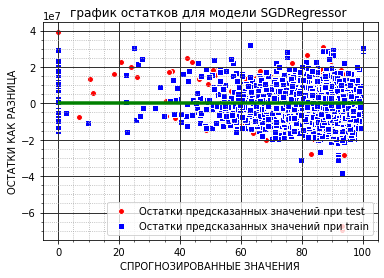

In [93]:
#                          модель SGDRegressor

param_dist = {"eta0": [0.000001,0.0001,0.001]} 
model_sgd = SGDRegressor(tol=.0001) 
n_iter_search = 15 
random_search = RandomizedSearchCV(model_sgd, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search, 
                                   cv=5 
                                   ) 
random_search.fit(features_train_rougher,target_rougher) 
pred_train = random_search.predict(features_train_rougher)
pred_test = random_search.predict(features_test_rougher)
print('Лучший параметр eta0:',random_search.best_params_)
print('Лучшая выбранная модель:',random_search.best_estimator_)

print('R2 для predict на train=',r2_score(target_rougher,pred_train))
print('R2 для predict на test=',r2_score(target_test_rougher,pred_test))



# строим график остатков модель SGDRegressor
plt.scatter(target_test_rougher,target_test_rougher-pred_test,
         c='red',marker='o',edgecolor='white',
         label='Остатки предсказанных значений при test')

plt.scatter(target_rougher,target_rougher-pred_train,
           c='blue',marker='s',edgecolor='white',
           label='Остатки предсказанных значений при train')
plt.xlabel('СПРОГНОЗИРОВАННЫЕ ЗНАЧЕНИЯ')
plt.ylabel('ОСТАТКИ КАК РАЗНИЦА')
plt.legend(loc='lower right')
plt.hlines(y=0,xmin=0,xmax=100,color='green',lw=3.5)
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('график остатков для модели SGDRegressor ');                                                                


R2 для predict на train= 0.5387161462729466
R2 для predict на test= -2.8537415154996606


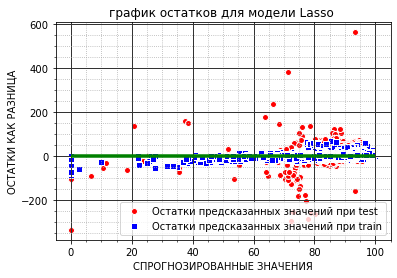

In [100]:
#    L1 Lasso регуляризация

model_lasso = make_pipeline(StandardScaler(),PolynomialFeatures(3),Lasso(alpha=0.0001))
model_lasso.fit(features_train_rougher,target_rougher)
pred_train = model_lasso.predict(features_train_rougher)
pred_test = model_lasso.predict(features_test_rougher)
print('R2 для predict на train=',r2_score(target_rougher,pred_train))
print('R2 для predict на test=',r2_score(target_test_rougher,pred_test))

                            
# строим график остатков модель Lasso
plt.scatter(target_test_rougher,target_test_rougher-pred_test,
         c='red',marker='o',edgecolor='white',
         label='Остатки предсказанных значений при test')

plt.scatter(target_rougher,target_rougher-pred_train,
           c='blue',marker='s',edgecolor='white',
           label='Остатки предсказанных значений при train')
plt.xlabel('СПРОГНОЗИРОВАННЫЕ ЗНАЧЕНИЯ')
plt.ylabel('ОСТАТКИ КАК РАЗНИЦА')
plt.legend(loc='lower right')
plt.hlines(y=0,xmin=0,xmax=100,color='green',lw=3.5)
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('график остатков для модели Lasso ');                                                                
                            


R2 для predict на train= 0.5857279495157945
R2 для predict на test= -458.1279408235769


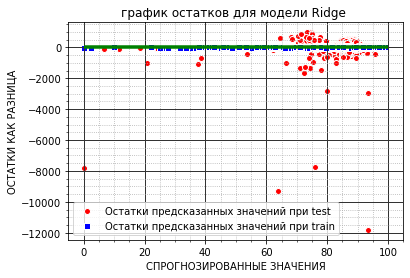

In [94]:
#    L2 гребневая регуляризация

model_ridge = make_pipeline(StandardScaler(),PolynomialFeatures(3),Ridge(alpha=0.01))
model_ridge.fit(features_train_rougher,target_rougher)
pred_train = model_ridge.predict(features_train_rougher)
pred_test = model_ridge.predict(features_test_rougher)

print('R2 для predict на train=',r2_score(target_rougher,pred_train))
print('R2 для predict на test=',r2_score(target_test_rougher,pred_test))

                            
# строим график остатков модель Lasso
plt.scatter(target_test_rougher,target_test_rougher-pred_test,
         c='red',marker='o',edgecolor='white',
         label='Остатки предсказанных значений при test')

plt.scatter(target_rougher,target_rougher-pred_train,
           c='blue',marker='s',edgecolor='white',
           label='Остатки предсказанных значений при train')
plt.xlabel('СПРОГНОЗИРОВАННЫЕ ЗНАЧЕНИЯ')
plt.ylabel('ОСТАТКИ КАК РАЗНИЦА')
plt.legend(loc='best')
plt.hlines(y=0,xmin=0,xmax=100,color='green',lw=3.5)
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('график остатков для модели Ridge ');        

In [32]:
# решетка для DecisionTreeRegressor
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=12345))
params_grid = {'decisiontreeregressor__max_depth':[1,5,9]}
grid = GridSearchCV(pipe_tree, param_grid=params_grid,cv=3)
grid=grid.fit(features_train_rougher,target_rougher)
smape_score_rougher = cross_val_score(grid,features_train_rougher,target_rougher,scoring = scorer,verbose=2, cv = 5)
print('Лучшая SMAPE модели DecisionTreeRegressor',smape_score_rougher.mean().round(2))
print('Лучший параметр глубины дерева DecisionTreeRegressor:',grid.best_params_)
print('Лучшая выбранная модель:',grid.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   1.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.1s
Лучшая SMAPE модели DecisionTreeRegressor -12.15
Лучший параметр глубины дерева DecisionTreeRegressor: {'decisiontreeregressor__max_depth': 1}
Лучшая выбранная модель: Pipeline(steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=1, random_state=12345))])


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.4s finished


R2 для predict на train= 0.999892587727769
R2 для predict на test= -2.495789527921044


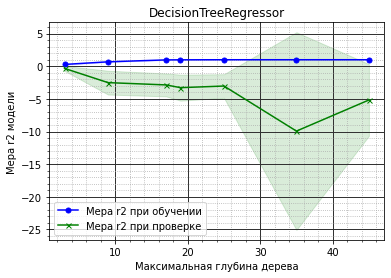

Text(0.5, 1.0, 'график остатков DecisionTreeRegressor')

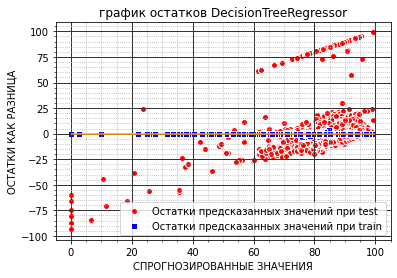

In [95]:
model_dtr = DecisionTreeRegressor(max_depth = 35,random_state=12345)
model_dtr.fit(features_train_rougher,target_rougher)
pred_train = model_dtr.predict(features_train_rougher)
pred_test = model_dtr.predict(features_test_rougher)
print('R2 для predict на train=',r2_score(target_rougher,pred_train))
print('R2 для predict на test=',r2_score(target_test_rougher,pred_test))


#         Строим кривую проверки
param_range =[3,9,17,19,25,35,45]
pipe_dt_val=make_pipeline(DecisionTreeRegressor(random_state=12345))
                     
                           
train_scores,test_scores=validation_curve(
                                         estimator=pipe_dt_val,
                                         X=features_train_rougher,y=target_rougher,
                                         param_name='decisiontreeregressor__max_depth',
                                         param_range=param_range,cv=5,scoring='r2')
    
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1) 
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)  

plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='Мера r2 при обучении')
plt.fill_between(param_range,train_mean + train_std,
                             train_mean - train_std,
                            alpha=0.1,color='blue')
plt.plot(param_range,test_mean,color='green',linestyle='-',marker='x',markersize=5,\
                 label='Мера r2 при проверке')
plt.fill_between(param_range,test_mean + test_std,
                             test_mean - test_std,
                 
                            alpha=0.15,color='green')
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('DecisionTreeRegressor')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Мера r2 модели')
plt.legend(loc='best');                 
plt.show()
 # строим график остатков
plt.scatter(target_test_rougher,target_test_rougher-pred_test,
         c='red',marker='o',edgecolor='white',
         label='Остатки предсказанных значений при test')

plt.scatter(target_rougher,target_rougher-pred_train,
           c='blue',marker='s',edgecolor='white',
           label='Остатки предсказанных значений при train')
plt.xlabel('СПРОГНОЗИРОВАННЫЕ ЗНАЧЕНИЯ')
plt.ylabel('ОСТАТКИ КАК РАЗНИЦА')
plt.legend(loc='lower right')
plt.hlines(y=0,xmin=0,xmax=100,color='orange',lw=1.5)
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('график остатков DecisionTreeRegressor')


In [34]:
# модель RandomForestRegressor
model_rfr = make_pipeline (RandomForestRegressor(random_state=12345))
param_grid ={'randomforestregressor__n_estimators':range(5,35,10),
            'randomforestregressor__max_depth':range(1,5,1)}
grid = GridSearchCV(model_rfr, param_grid,cv=3,refit=True,\
                     n_jobs=-1,scoring=scorer)
grid=grid.fit(features_train_rougher,target_rougher)
smape_score_rougher = cross_val_score(grid,features_train_rougher,target_rougher,scoring=scorer,n_jobs=-1,verbose=1,cv=5)
print('Лучшая SMAPE модели на RandomForestRegressor ',smape_score_rougher.mean().round(2))
print('Лучший параметр количества деревьев RandomForestRegressor:',grid.best_params_)
print('Лучшая выбранная модель:',grid.best_estimator_)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Лучшая SMAPE модели на RandomForestRegressor  -12.75
Лучший параметр количества деревьев RandomForestRegressor: {'randomforestregressor__max_depth': 1, 'randomforestregressor__n_estimators': 5}
Лучшая выбранная модель: Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(max_depth=1, n_estimators=5,
                                       random_state=12345))])


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.5s finished


R2 для predict на train= 0.08744784534949779
R2 для predict на test= -0.11679978511238032


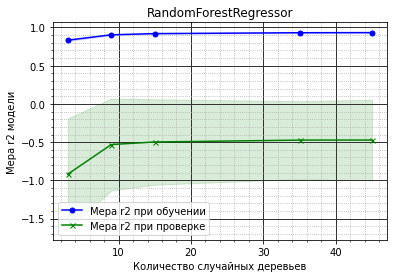

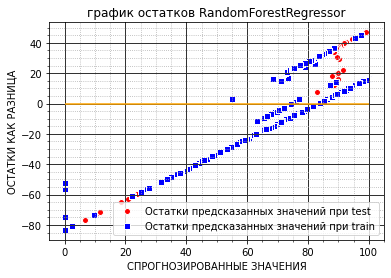

In [96]:
model_rfr = RandomForestRegressor(n_estimators=35,
                                  max_depth=1,random_state=12345)
model_rfr.fit(features_train_rougher,target_rougher)
pred_train = model_rfr.predict(features_train_rougher)
pred_test = model_rfr.predict(features_test_rougher)
print('R2 для predict на train=',r2_score(target_rougher,pred_train))
print('R2 для predict на test=',r2_score(target_test_rougher,pred_test))


#         Строим кривую проверки
param_range =[3,9,15,35,45]
pipe_rfr_val=make_pipeline(RandomForestRegressor(random_state=12345))
                     
                           
train_scores,test_scores=validation_curve(
                                         estimator=pipe_rfr_val,
                                         X=features_train_rougher,y=target_rougher,
                                         param_name='randomforestregressor__n_estimators',
                                         param_range=param_range,cv=5,scoring='r2')
    
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1) 
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)  

plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='Мера r2 при обучении')
plt.fill_between(param_range,train_mean + train_std,
                             train_mean - train_std,
                            alpha=0.1,color='blue')
plt.plot(param_range,test_mean,color='green',linestyle='-',marker='x',markersize=5,\
                 label='Мера r2 при проверке')
plt.fill_between(param_range,test_mean + test_std,
                             test_mean - test_std,
                 
                            alpha=0.15,color='green')
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('RandomForestRegressor')
plt.xlabel('Количество случайных деревьев')
plt.ylabel('Мера r2 модели')
plt.legend(loc='best');                 
plt.show()

 # строим график остатков
plt.scatter(target_test_rougher,target_test_rougher-pred_test,
         c='red',marker='o',edgecolor='white',
         label='Остатки предсказанных значений при test')

plt.scatter(target_rougher,target_rougher-pred_train,
           c='blue',marker='s',edgecolor='white',
           label='Остатки предсказанных значений при train')
plt.xlabel('СПРОГНОЗИРОВАННЫЕ ЗНАЧЕНИЯ')
plt.ylabel('ОСТАТКИ КАК РАЗНИЦА')
plt.legend(loc='lower right')
plt.hlines(y=0,xmin=0,xmax=100,color='orange',lw=1.5)
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('график остатков RandomForestRegressor');

plt.show()


Вычислим метрику sMAPE

In [37]:
def sMape_result(y, y_pred):
    
    smape_res = 100/len(y)*np.sum(2*np.abs(y_pred - y) /\
                                             (np.abs(y) + np.abs(y_pred)))
    return smape_res


In [38]:
model_lr = LinearRegression()
model_lr.fit(features_train_rougher,target_rougher)
pred_rougher = model_lr.predict(features_train_rougher)
smape_rougher = sMape_result(target_rougher,pred_rougher)

model_lr.fit(features_train_final,target_final)
pred_final = model_lr.predict(features_train_final)
smape_final = sMape_result(target_final,pred_final)
print('ИТОГОВОЕ значение sMAPE на train выборке:',(0.25*smape_rougher + 0.75*smape_final).round(1))

ИТОГОВОЕ значение sMAPE на train выборке: 9.3


In [39]:
model_lr.fit(features_test_rougher,target_test_rougher)
pred_rougher = model_lr.predict(features_test_rougher)
smape_rougher = sMape_result(target_test_rougher,pred_rougher)

model_lr.fit(features_test_final,target_test_final)
pred_final = model_lr.predict(features_test_final)
smape_final = sMape_result(target_test_final,pred_final)
print('ИТОГОВОЕ значение sMAPE на test выборке:',(0.25*smape_rougher + 0.75*smape_final).round(1))

ИТОГОВОЕ значение sMAPE на test выборке: 8.4


In [40]:
#посмотрим константную модель
rougher_dummy = DummyRegressor()
rougher_dummy.fit(features_train_rougher,target_rougher)
train_dummy_pred = rougher_dummy.predict(features_train_rougher)
print('sMAPE константной модели этапа флоатации на тренировочной выборке:',\
      sMape_result(target_rougher,train_dummy_pred ))

sMAPE константной модели этапа флоатации на тренировочной выборке: 11.82159546024086


Ну прям вполне можно и использовать константную модель.
А интересно как часто результата на реальных моделях сильно отличаются от константных и всегда ли надо проверять на них.

ОБЩИЙ ВЫВОД ПРОЕКТА

1. После анализа загруженных данных проекта была произведена предподготовка их для испытания моделей.
2. Построены требуемые ТЗ зависимости концентраций металлов на различных стадиях технологического процесса.
3. Построены гистограммы размеров гранул на тренировочной и тестовой выборках-размеры очень близкие.
4. Построены гистограммы эффектиности очистки золота для тринировки и теста - выявленные аномалии 0% и 100% обсуждены.
5. По результатам испытаний была выбрана модель линейной регрессии,которая дала метрику R2=0.38.
   На этой модели вычислены метрика sMAPE 8.4 и 9.3 соответственно
   В каждом результате проекта сделаны необходимые выводы.
   Спасибо.
PS.
Раньше представление о добыче золота складывалось только лишь из песни моей молодости(грусная)
"По диким степям Забайкалья
 Где золото МОЮТ в горах
 Бродяга судьбу проклиная
 Тащился с сумой на плечах......."

